# Topic:        Challenge Set 6
## Subject:     Linear Regression and Learning Curve challenges
## Date:         01/28/2018
### Name:         Mauro Mario Gentile

In [73]:
import re
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import string
import patsy
import pickle
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [74]:
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=10,alpha=0.3)   # our data 
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)



##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)



In [75]:
def f(x):
    return 5+ 3*np.log(1+x)

In [76]:
x_plot = np.linspace(0, 10, 1000)
y_plot=np.max(f(x_plot))

In [77]:
# generate points and keep a subset of them
n_samples = 10000

In [78]:
x_plot = np.linspace(0, 100, 1000)
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(0, 100, size=n_samples)[:, np.newaxis]  # force matrix
# Generate the y values by taking the sin and adding a random Gaussian (normal) noise term
y = f(X) + np.random.normal(0, 1, n_samples)[:, np.newaxis]

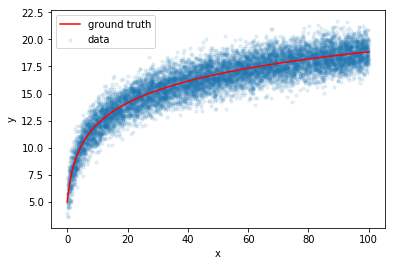

In [79]:
fig,ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label='ground truth', color='red')
ax.scatter(X, y, label='data', s=10,alpha=0.1)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

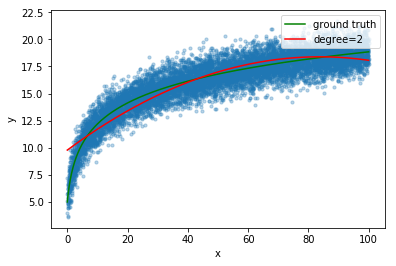

In [80]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept=False))
# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

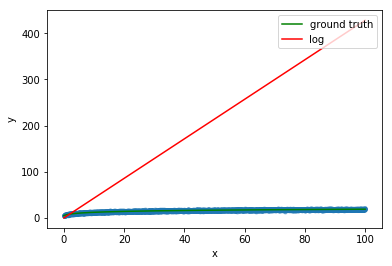

In [82]:
# Set up the plot
fig,ax = plt.subplots(1,1)
X = np.random.uniform(0, 100, size=n_samples)[:, np.newaxis]
y=f(X)+ np.random.normal(0, 1, n_samples)[:, np.newaxis]
X_log=np.log(X+1)

est = LinearRegression(fit_intercept=False)
# Fit our model to the training data
est.fit(X_log, y)
# Plot the results
plot_approximation(est, ax, label='log')

In [ ]:
????


## Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)




In [83]:
np.random.seed(9)

def f(x):
    return 2 + 4*x+6*x*x

x_plot = np.linspace(0, 100, 1000)

# generate points and keep a subset of them
n_samples = 1000
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(0, 100, size=n_samples)[:, np.newaxis]  # force matrix
# Generate the y values by taking the sin and adding a random Gaussian (normal) noise term
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [85]:
model=LinearRegression()

In [86]:
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9364844642009212
0.9354635941791992


In [66]:
#similar values

##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC


In [95]:
train_error=[]
test_error=[]
R2=[]
AIC=[]

for degree in range(0,8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept=False))
    est.fit(X_train, y_train)
    
    y_predicted_train=est.predict(X_train)
    train_error.append(sum((y_predicted_train-y_train)**2))
    
    y_predicted_test=est.predict(X_test)
    test_error.append(sum((y_predicted_test-y_test)**2))
    mean=np.mean(y_test)
    R2.append(1-(sum((y_predicted_test-y_test)**2)/(sum((y_test-mean)**2) )))
    
    AIC.append(2*2 - 2*np.log((sum((y_predicted_test-y_test)**2))))

  

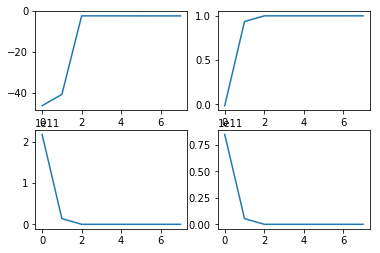

In [100]:
plt.subplot(2,2,1)
plt.plot(AIC)
plt.subplot(2,2,2)
plt.plot(R2)
plt.subplot(2,2,3)
plt.plot(train_error)
plt.subplot(2,2,4)
plt.plot(test_error)


##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). 
In this manner, keep fitting until you fit your entire training set. 
For each step, calculate the training error and the test error. 
Plot both (in the same plot) over m. This is called a learning curve.


700

In [109]:
train_error=[]
test_error=[]

for i in range(5,len(X_train),5):
    est = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept=False))
    est.fit(X_train[:i], y_train[:i])
    
    y_predicted_train=est.predict(X_train[:i])
    train_error.append(np.mean((y_predicted_train-y_train[:i])**2))
    
    y_predicted_test=est.predict(X_test[:i])
    test_error.append(np.mean((y_predicted_test-y_test[:i])**2))
    

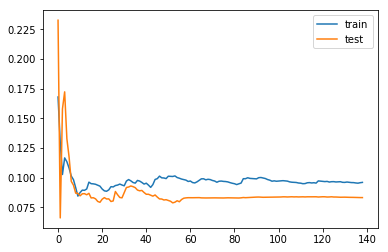

In [110]:

plt.plot(train_error,label="train")
plt.plot(test_error,label="test")
plt.legend()